# MovieLens Data Analysis Notebook

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Loading
- **Path setup** for datasets  
- **Load CSV files:** ratings, movies, users, merged ratings-movies  
- **Check dataset shapes** (rows, columns)  

In [2]:
data_path = Path("Datasets")

ratings = pd.read_csv(data_path / 'ratings.csv', parse_dates=['datetime'])
movies = pd.read_csv(data_path / 'movies.csv')
users = pd.read_csv(data_path / 'users.csv')
ratings_movies = pd.read_csv(data_path / 'ratings_movies.csv', parse_dates=['datetime'])


In [3]:
print("Dataset Shapes:")
print(f"Ratings: {ratings.shape}")
print(f"Movies: {movies.shape}")
print(f"Users: {users.shape}")
print(f"Ratings_Movies: {ratings_movies.shape}")

Dataset Shapes:
Ratings: (100000, 4)
Movies: (1679, 23)
Users: (943, 5)
Ratings_Movies: (99987, 6)


## Ratings Distribution
- **Bar chart:** frequency of ratings (1–5)  
- **Descriptive statistics:** mean, std, quartiles  
- **Skewness:** distribution symmetry  


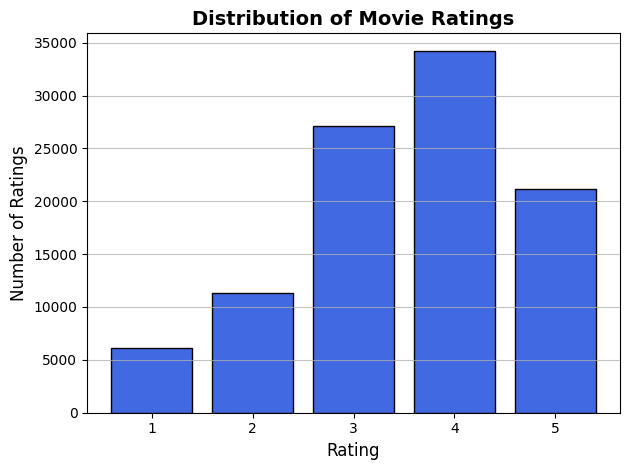

In [4]:
rating_counts = ratings['rating'].value_counts().sort_index()
plt.bar(rating_counts.index, rating_counts.values, color="royalblue", edgecolor="black")
plt.title("Distribution of Movie Ratings", fontsize=14, weight="bold")
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Number of Ratings", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

In [5]:
# Descriptive statistics and skewness
rating_stats = ratings['rating'].describe()
skewness = ratings['rating'].skew()
print(rating_stats)
print(f"\nSkewness: {skewness:.4f}")

count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

Skewness: -0.5101


## User Activity Analysis  
Examine user engagement by counting ratings per user.  

- **Summary stats** capture distribution (mean ≈ 106, max = 737).  
- **Top 10 users** illustrate extreme activity levels.  
- **Histogram** shows most users give fewer than 100 ratings.  
- **Boxplot** highlights heavy right-skew and outliers (super-active users).  

In [6]:
# Count ratings per user
user_activity = ratings["user_id"].value_counts()
activity_summary = user_activity.describe().to_frame("Value")
display(activity_summary.T)

,count,mean,std,min,25%,50%,75%,max
Value,943.0,106.044539,100.931743,20.0,33.0,65.0,148.0,737.0


In [7]:
top_users = user_activity.head(10).reset_index()
top_users.columns = ["User ID", "Ratings Given"]
top_users.T

,0,1,2,3,4,5,6,7,8,9
User ID,405,655,13,450,276,416,537,303,234,393
Ratings Given,737,685,636,540,518,493,490,484,480,448


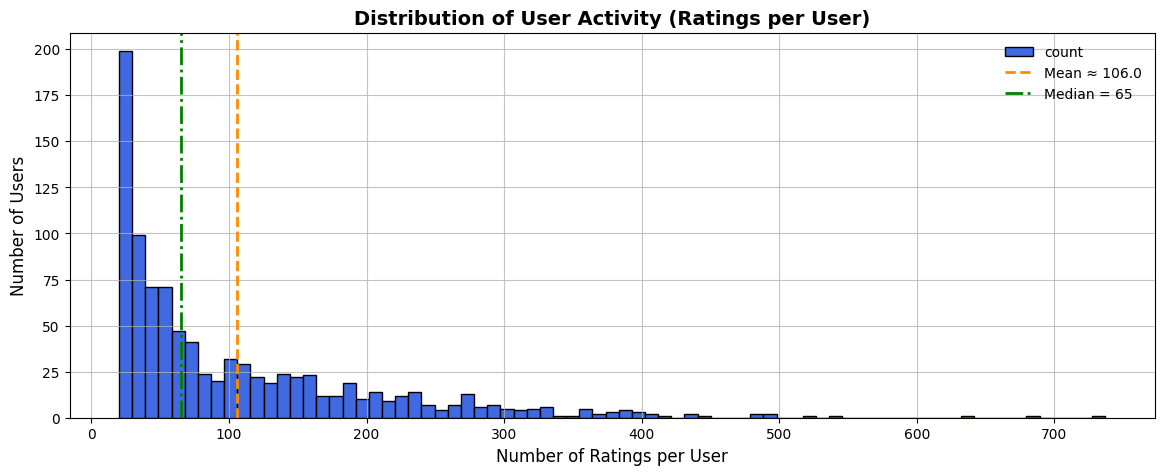

In [8]:
ax = user_activity.plot(kind="hist", bins=75, figsize=(14,5), color="royalblue", edgecolor="black")

# Compute mean and median
mean_val = user_activity.mean()
median_val = user_activity.median()

# Add mean and median lines
plt.axvline(mean_val, color="darkorange", linestyle="--", linewidth=2, label=f"Mean ≈ {mean_val:.1f}")
plt.axvline(median_val, color="green", linestyle="-.", linewidth=2, label=f"Median = {median_val:.0f}")

# Titles and labels
plt.title("Distribution of User Activity (Ratings per User)", fontsize=14, weight="bold")
plt.xlabel("Number of Ratings per User", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.grid(alpha=0.75)
plt.legend(frameon=False)

plt.show()

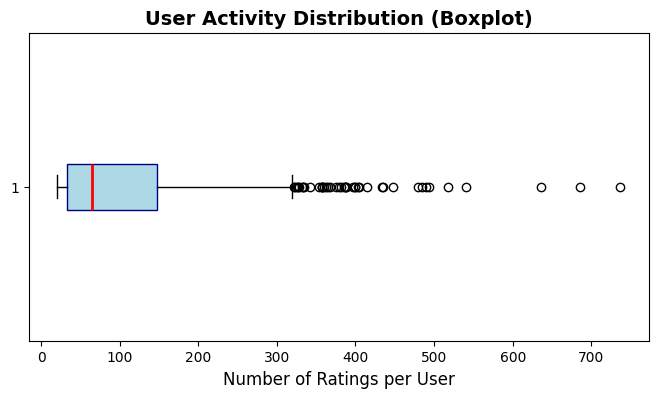

In [9]:
plt.figure(figsize=(8,4))
plt.boxplot(
    user_activity, vert=False, patch_artist=True, 
    boxprops=dict(facecolor="lightblue", color="navy"),
    medianprops=dict(color="red", linewidth=2),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black")
)
plt.title("User Activity Distribution (Boxplot)", fontsize=14, weight="bold")
plt.xlabel("Number of Ratings per User", fontsize=12)
plt.show()

## Movie Popularity
- **Statistics:** number of ratings per movie (summary stats)  
- **Histogram (log scale):** distribution of movie popularity  
- **Boxplot:** spread of ratings per movie  

In [10]:
movie_pop = ratings['movie_id'].value_counts()
movie_pop_stats = movie_pop.describe().to_frame().T
print("Movie Popularity Statistics:")
movie_pop_stats

Movie Popularity Statistics:


,count,mean,std,min,25%,50%,75%,max
count,1682.0,59.453032,80.383846,1.0,6.0,27.0,80.0,583.0


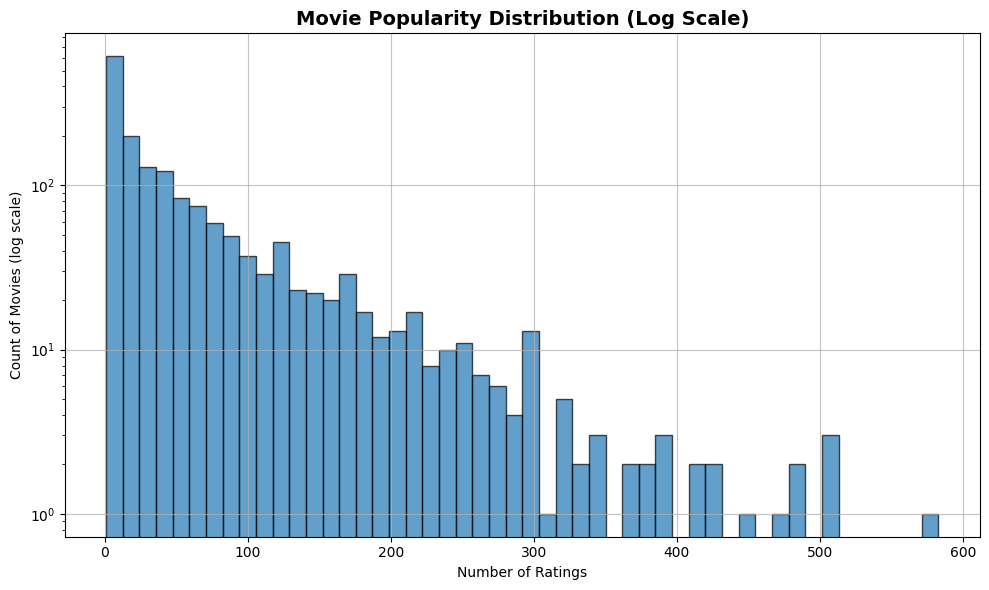

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(movie_pop, bins=50, log=True, edgecolor='black', alpha=0.7)
plt.title("Movie Popularity Distribution (Log Scale)", fontsize=14, weight="bold")
plt.xlabel('Number of Ratings')
plt.ylabel('Count of Movies (log scale)')
plt.grid(alpha=0.75)
plt.tight_layout()
plt.show()

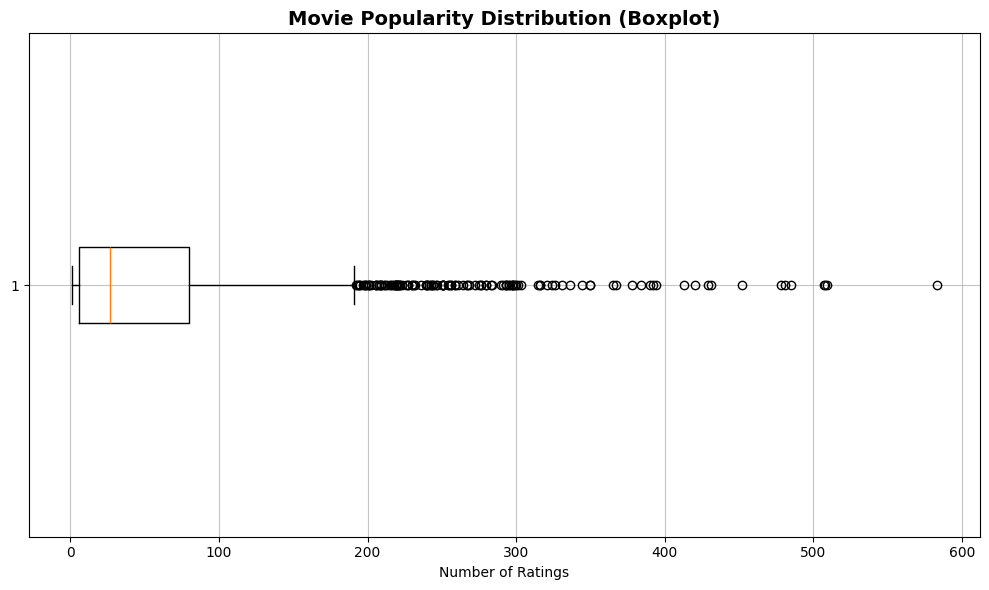

In [12]:
plt.figure(figsize=(10, 6))
plt.boxplot(movie_pop, vert=False)
plt.title("Movie Popularity Distribution (Boxplot)", fontsize=14, weight="bold")
plt.xlabel('Number of Ratings')
plt.grid(alpha=0.75)
plt.tight_layout()
plt.show()

## Top 20 Movies
- **Extract top 20 movies** by rating count  
- **Display titles with counts**  
- **Horizontal bar chart** for visualization  

In [13]:
# Top 20 most-rated movies with titles
top20_movies = movie_pop.head(20).reset_index()
top20_movies.columns = ['movie_id', 'rating_count']
top20_movies = pd.merge(top20_movies, movies[['movie_id', 'title']], on='movie_id')

# Display the top 20 movies
top20_movies[['title', 'rating_count']]

,title,rating_count
0,Star Wars (1977),583
1,Contact (1997),509
2,Fargo (1996),508
3,Return of the Jedi (1983),507
4,Liar Liar (1997),485
5,"English Patient, The (1996)",481
6,Scream (1996),478
7,Toy Story (1995),452
8,Air Force One (1997),431
9,Independence Day (ID4) (1996),429


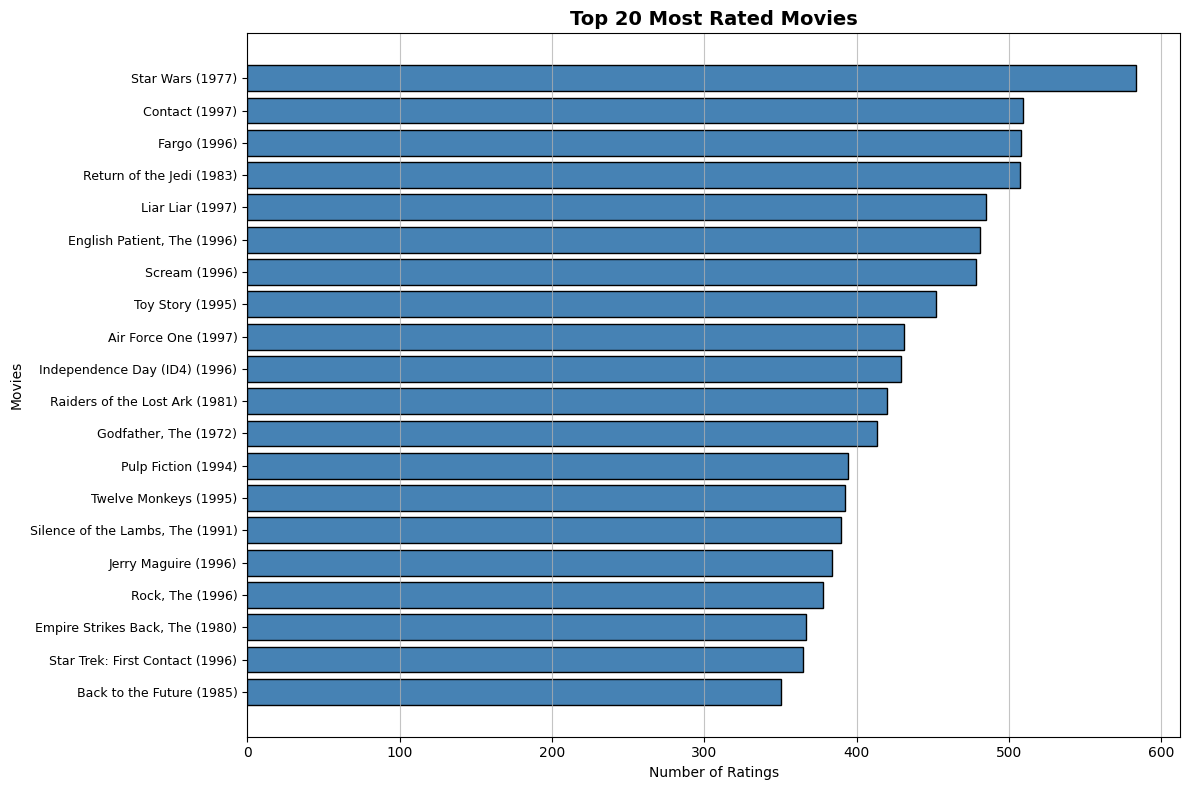

In [14]:
# Visualization: Top 20 most-rated movies
plt.figure(figsize=(12, 8))
plt.barh(range(20), top20_movies["rating_count"], color="steelblue", edgecolor="black")
plt.title('Top 20 Most Rated Movies', fontsize=14, weight="bold")
plt.xlabel('Number of Ratings')
plt.ylabel('Movies')
plt.yticks(range(20), top20_movies["title"], fontsize=9)
plt.gca().invert_yaxis()  # Display highest rated at the top
plt.grid(axis='x', alpha=0.75)
plt.tight_layout()
plt.show()

## Temporal Analysis
- **Time Range:** first and last rating dates  
- **Daily Trends:** daily counts + 7-day moving average  
- **Monthly Trends:** monthly counts of ratings  
- **Weekly Patterns:** ratings by day of week (Mon–Sun)  
- **Hourly Patterns:** ratings by hour of day (0–23)  
- **Monthly Average Rating:** mean rating per month  

In [15]:
first_date = ratings["datetime"].min()
last_date  = ratings["datetime"].max()

print("First rating date:", first_date)
print("Last rating date :", last_date)

First rating date: 1997-09-20 03:05:10
Last rating date : 1998-04-22 23:10:38


In [16]:
# Temporal Patterns
# Ensure datetime exists and is sorted; set as index for resampling
ts = ratings[["datetime"]].copy()
ts = ts.sort_values("datetime").set_index("datetime")

# Create time-based features
ratings['hour'] = ratings['datetime'].dt.hour
ratings['day_of_week'] = ratings['datetime'].dt.dayofweek  # 0=Monday, 6=Sunday

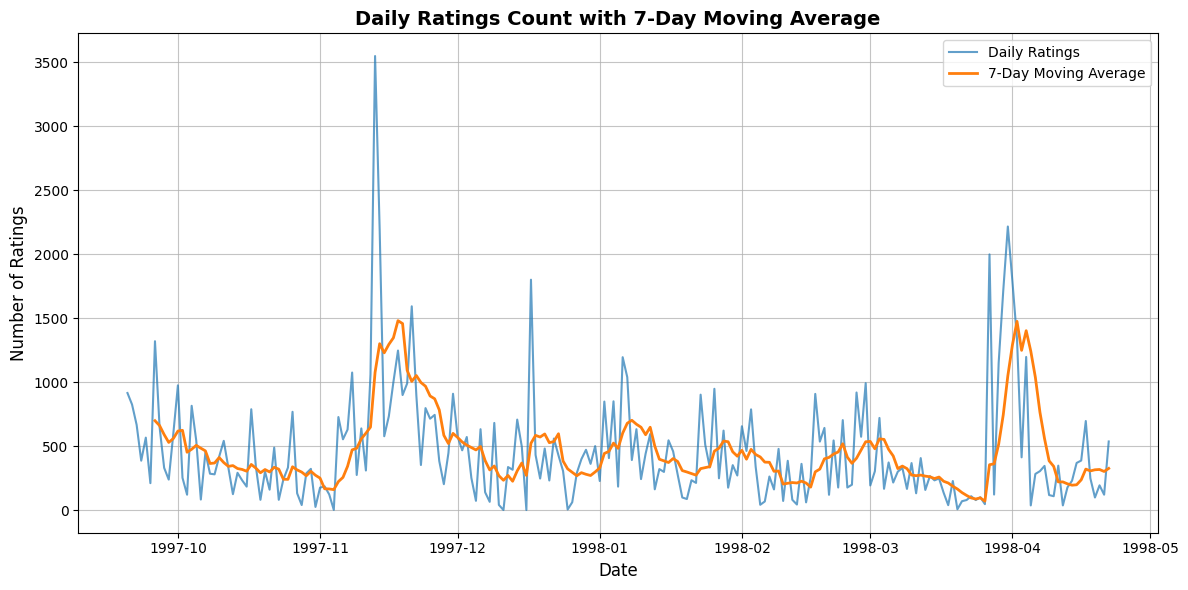

In [17]:
# Daily ratings count and 7-day moving average
daily_counts = ts.resample('D').size()
moving_avg = daily_counts.rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts.values, alpha=0.7, label='Daily Ratings')
plt.plot(moving_avg.index, moving_avg.values, linewidth=2, label='7-Day Moving Average')
plt.title('Daily Ratings Count with 7-Day Moving Average', fontsize=14, weight="bold")
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.legend()
plt.grid(alpha=0.75)
plt.tight_layout()
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_12768\952182118.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = ts.resample('M').size()


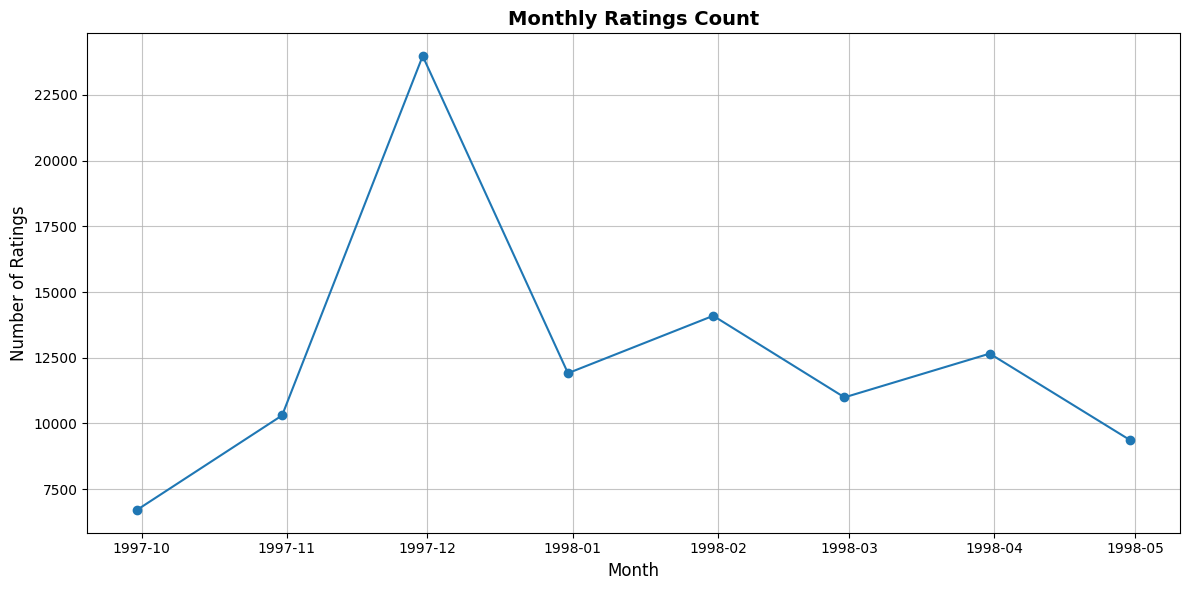

In [18]:
# Monthly ratings count
monthly_counts = ts.resample('M').size()

plt.figure(figsize=(12, 6))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o')
plt.title('Monthly Ratings Count', fontsize=14, weight="bold")
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.grid(alpha=0.75)
plt.tight_layout()
plt.show()

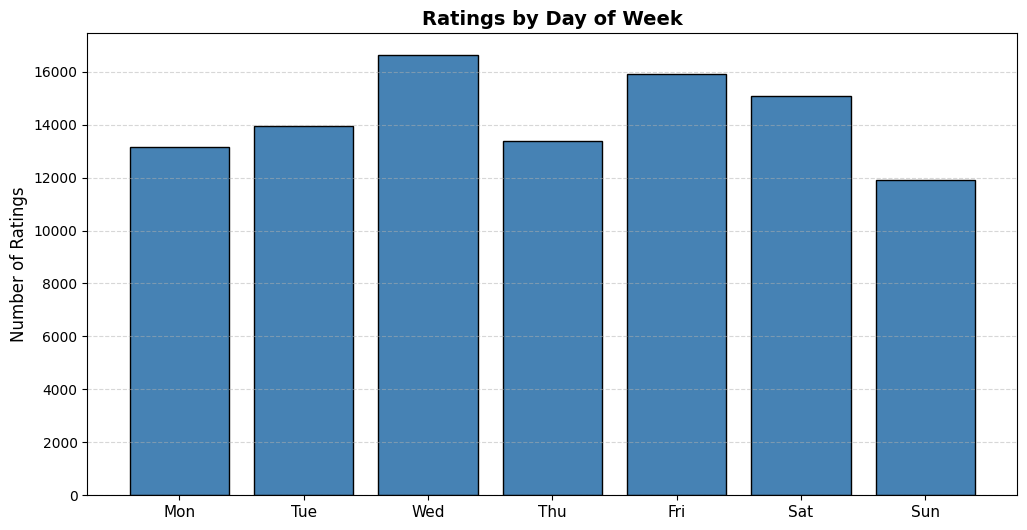

In [19]:
# Day-of-week (0=Mon … 6=Sun)
dow_counts = ratings['day_of_week'].value_counts().sort_index()
dow_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(12,6))
plt.bar(dow_counts.index, dow_counts.values, color="steelblue", edgecolor="black")
plt.xticks(range(7), dow_labels, fontsize=11)
plt.ylabel("Number of Ratings", fontsize=12)
plt.title("Ratings by Day of Week", fontsize=14, weight="bold")
plt.grid(axis="y", alpha=0.5, linestyle="--")
plt.show()

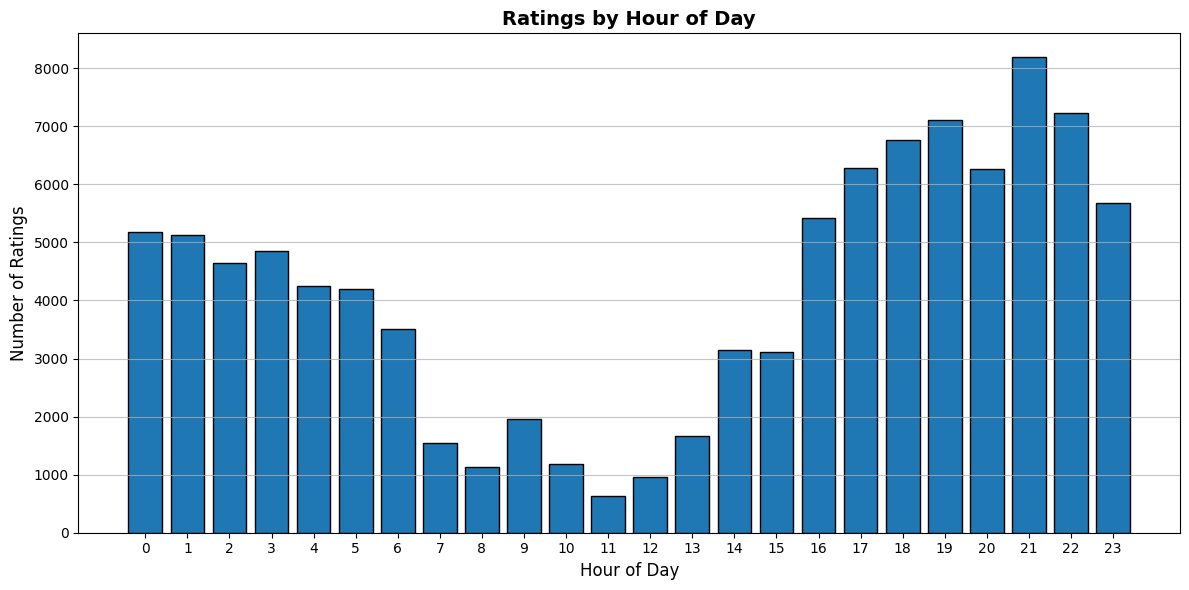

In [20]:
# Hour-of-day (0–23)
hour_counts = ratings['hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(hour_counts.index, hour_counts.values, edgecolor='black')
plt.title('Ratings by Hour of Day', fontsize=14, weight="bold")
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_12768\3611264225.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_rating = ratings.set_index('datetime').resample('M')['rating'].mean()


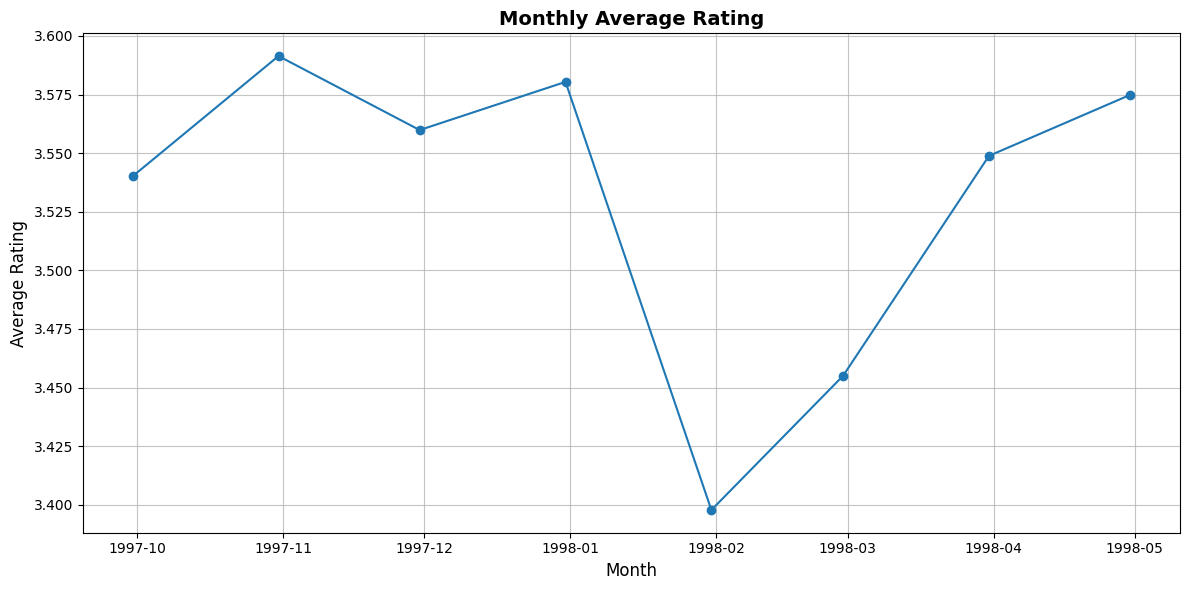

In [21]:
# Monthly average rating
monthly_avg_rating = ratings.set_index('datetime').resample('M')['rating'].mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_rating.index, monthly_avg_rating.values, marker='o')
plt.title('Monthly Average Rating', fontsize=14, weight="bold")
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.grid(alpha=0.75)
plt.tight_layout()
plt.show()

## Genre Analysis

- **Genre Extraction:** select genre-related columns from movies dataset  
- **Movies per Genre:** count of movies by genre (horizontal bar chart)  
- **Average Rating per Genre:** mean rating per genre (horizontal bar chart)  
- **Genre Statistics Table:** movie count, rating count, and average rating per genre  


In [22]:
# Extract all genre-related columns from movies DataFrame
genre_columns = [col for col in movies.columns if col not in ['movie_id', 'title', 'release_date', 'imdb_url', 'unknown']]
print(f"Genre columns: {genre_columns}")

Genre columns: ['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


In [23]:
movies_per_genre = movies[genre_columns].sum().sort_values(ascending=False)

C:\Users\Asus\AppData\Local\Temp\ipykernel_12768\2768484596.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=movies_per_genre.values, y=movies_per_genre.index, palette='BuGn_r', edgecolor='black', linewidth=0.5)


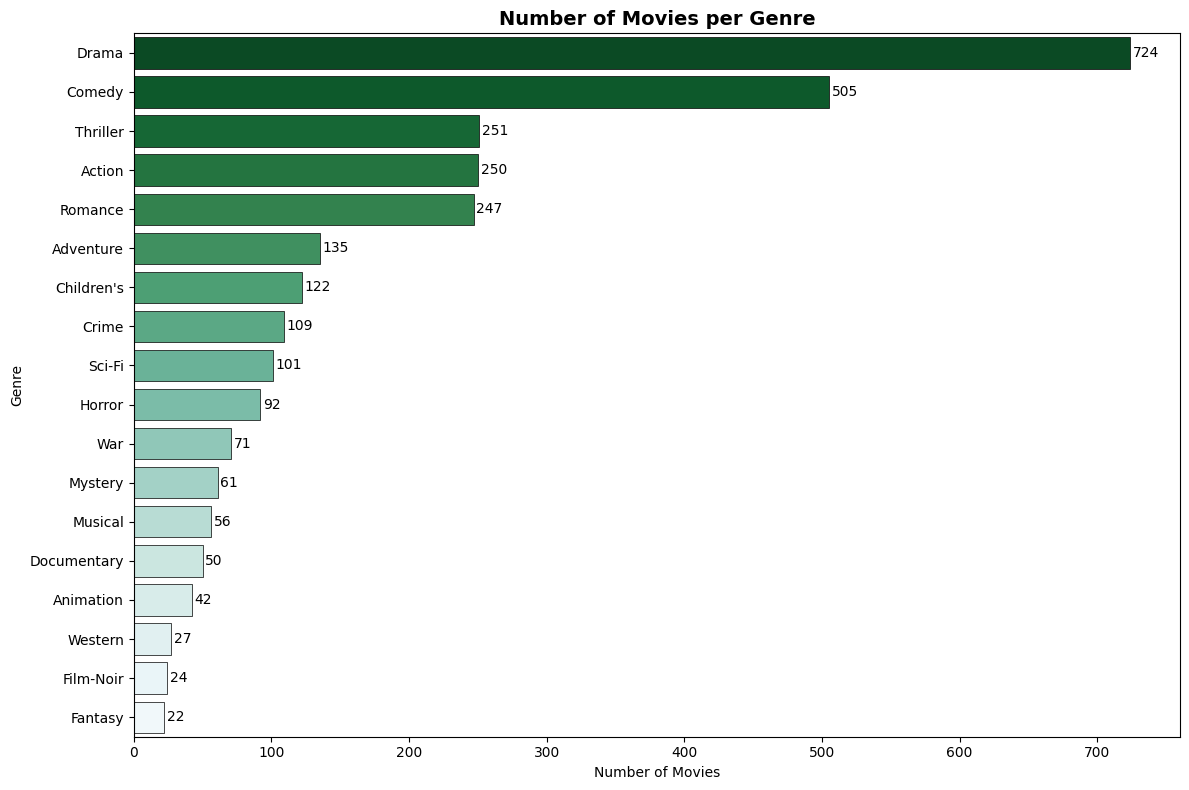

In [24]:
# Horizontal bar plot for better readability
plt.figure(figsize=(12, 8))
sns.barplot(x=movies_per_genre.values, y=movies_per_genre.index, palette='BuGn_r', edgecolor='black', linewidth=0.5)
plt.title('Number of Movies per Genre', fontsize=14, weight='bold')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')

# Add value labels on bars
for i, value in enumerate(movies_per_genre.values):
    plt.text(value + 2, i, f'{int(value)}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [25]:
# Average rating per genre analysis
# Merge ratings with movie genres
ratings_genres = pd.merge(ratings[['movie_id', 'rating']], movies[['movie_id'] + genre_columns], on='movie_id')

# Calculate average rating per genre
genre_ratings = {}
genre_counts = {}  # Number of ratings per genre

for genre in genre_columns:
    genre_mask = ratings_genres[genre] == 1
    genre_count = genre_mask.sum()
    if genre_count > 0:
        genre_ratings[genre] = ratings_genres.loc[genre_mask, 'rating'].mean()
        genre_counts[genre] = genre_count

genre_ratings_series = pd.Series(genre_ratings).sort_values(ascending=False)
genre_counts_series = pd.Series(genre_counts)

C:\Users\Asus\AppData\Local\Temp\ipykernel_12768\3524504019.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


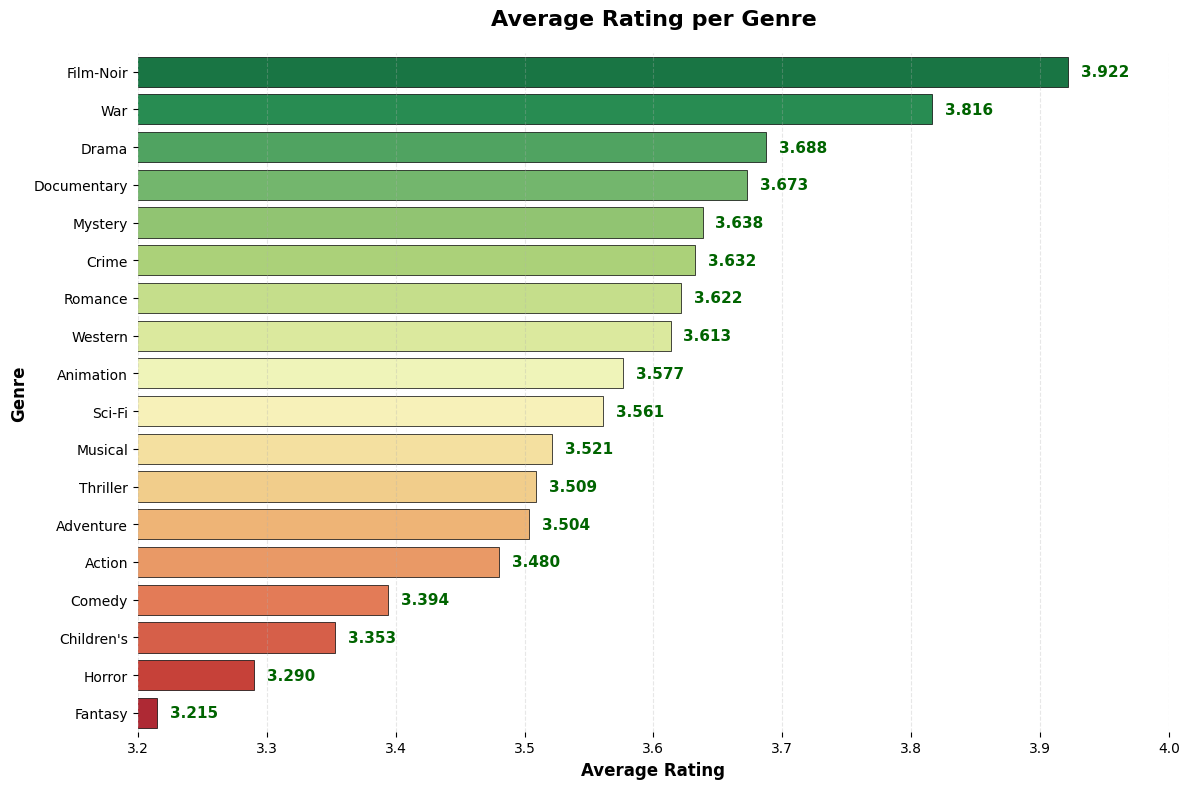

In [26]:
# Average rating per genre - horizontal bar plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x=genre_ratings_series.values,
    y=genre_ratings_series.index,
    palette="RdYlGn_r", edgecolor="black", linewidth=0.5, saturation=0.8
)

# Titles & labels
plt.title("Average Rating per Genre", fontsize=16, weight="bold", pad=20)
plt.xlabel("Average Rating", fontsize=12, weight="bold")
plt.ylabel("Genre", fontsize=12, weight="bold")

# Value labels
for i, v in enumerate(genre_ratings_series.values):
    plt.text(v + 0.01, i, f"{v:.3f}", ha="left", va="center", fontsize=11, weight="bold", color="darkgreen")

# Styling
plt.xlim(3.2, 4.0)
plt.grid(axis="x", alpha=0.3, ls="--")
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

In [27]:
# Create comprehensive genre statistics table for valid genres only
genre_stats = pd.DataFrame({
    'Movie Count': movies_per_genre,
    'Rating Count': genre_counts_series,
    'Average Rating': genre_ratings_series
}).dropna().sort_values('Average Rating', ascending=False)

print("Genre Statistics:")
genre_stats

Genre Statistics:


,Movie Count,Rating Count,Average Rating
Film-Noir,24,1733,3.921523
War,71,9398,3.815812
Drama,724,39893,3.687514
Documentary,50,758,3.672823
Mystery,61,5245,3.638132
Crime,109,8055,3.632278
Romance,247,19461,3.621705
Western,27,1854,3.613269
Animation,42,3605,3.576699
Sci-Fi,101,12730,3.560723


## User Demographics Analysis

- **Age Distribution:** histogram of user ages with mean line  
- **Gender Distribution:** pie chart of male vs female users  
- **Average Rating by Age Group:** comparison across age brackets  
- **Age by Gender:** boxplot of age distribution split by gender  
- **Occupation Distribution:** number of users per occupation  
- **Average Rating by Occupation:** mean rating grouped by occupation  


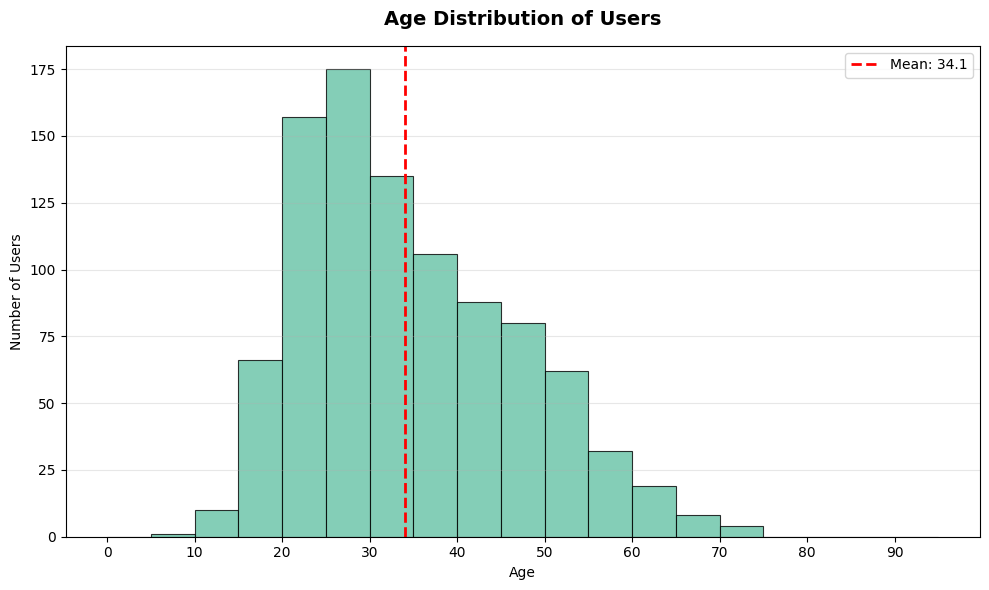

In [28]:
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(users['age'], bins=range(0, 100, 5), color='#66c2a5',edgecolor='black', linewidth=0.8, alpha=0.8)
mean_age = users['age'].mean()
plt.axvline(mean_age, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_age:.1f}')
plt.title('Age Distribution of Users', fontsize=14, weight='bold', pad=15)
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.xticks(range(0, 100, 10))
plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

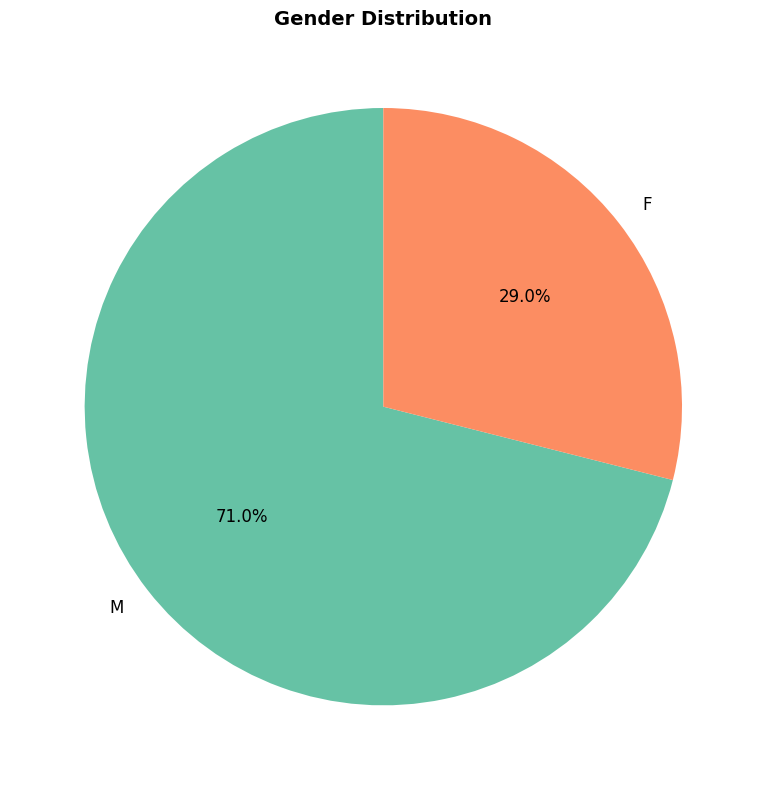

In [29]:
gender_counts = users['gender'].value_counts()
plt.figure(figsize=(8, 8))
colors = ['#66c2a5', '#fc8d62'] 
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=colors, textprops={'fontsize': 12})
plt.title('Gender Distribution', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

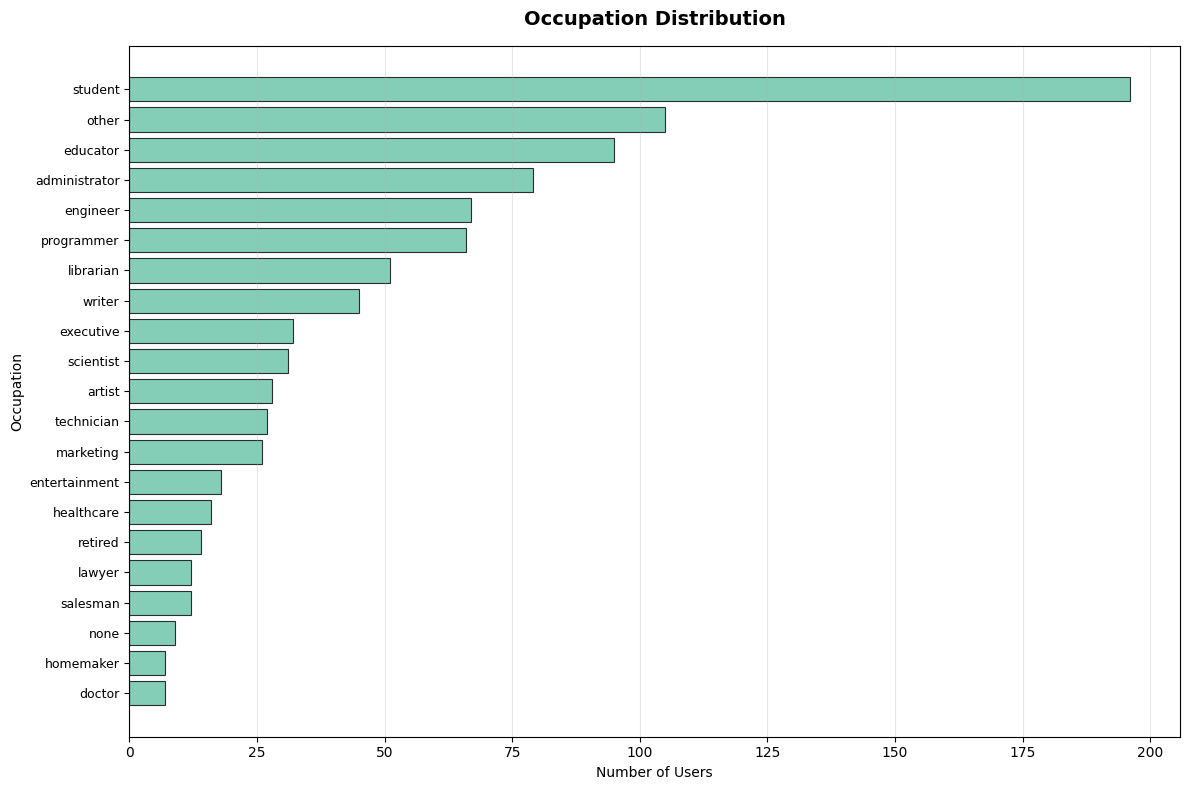

In [30]:
occupation_counts = users['occupation'].value_counts().sort_values(ascending=True)
plt.figure(figsize=(12, 8))
plt.barh(occupation_counts.index, occupation_counts.values, color='#66c2a5', edgecolor='black', linewidth=0.8, alpha=0.8)
plt.title('Occupation Distribution', fontsize=14, weight='bold', pad=15)
plt.xlabel('Number of Users')
plt.ylabel('Occupation')
plt.yticks(fontsize=9)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

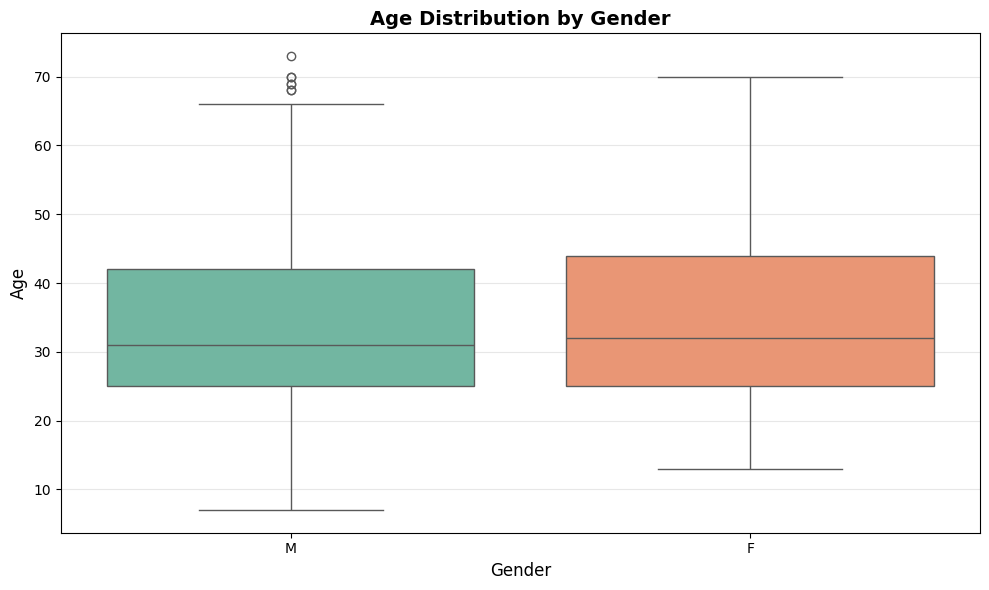

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='age', data=users, hue='gender', palette='Set2', dodge=False, legend=False)

plt.title('Age Distribution by Gender', fontsize=14, weight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


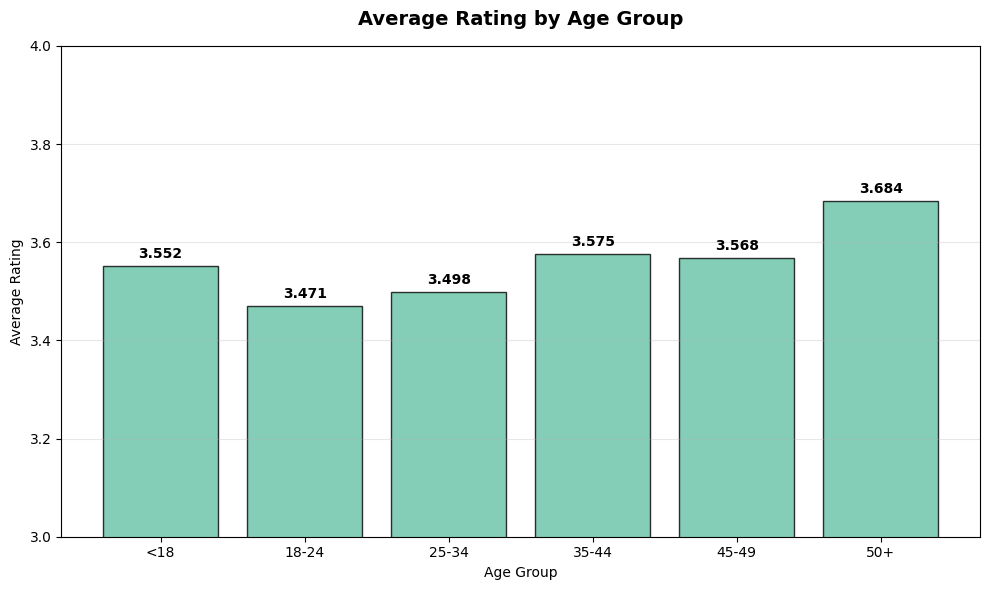

In [32]:
# Create age groups
age_bins = [0, 18, 25, 35, 45, 50, 100]
age_labels = ['<18', '18-24', '25-34', '35-44', '45-49', '50+']

# Merge ratings with users and create age groups
ratings_with_age = pd.merge(ratings[['user_id', 'rating']], users[['user_id', 'age']], on='user_id')
ratings_with_age['age_group'] = pd.cut(ratings_with_age['age'], bins=age_bins, labels=age_labels)

# Calculate average rating by age group
age_group_ratings = ratings_with_age.groupby('age_group', observed=False)['rating'].mean()

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(age_group_ratings.index, age_group_ratings.values, color='#66c2a5', edgecolor='black', alpha=0.8)
plt.title('Average Rating by Age Group', fontsize=14, weight='bold', pad=15)
plt.xlabel('Age Group')
plt.ylabel('Average Rating')
plt.ylim(3.0, 4.0)

# Add value annotations
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01, f'{height:.3f}', ha='center', va='bottom', fontsize=10, weight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

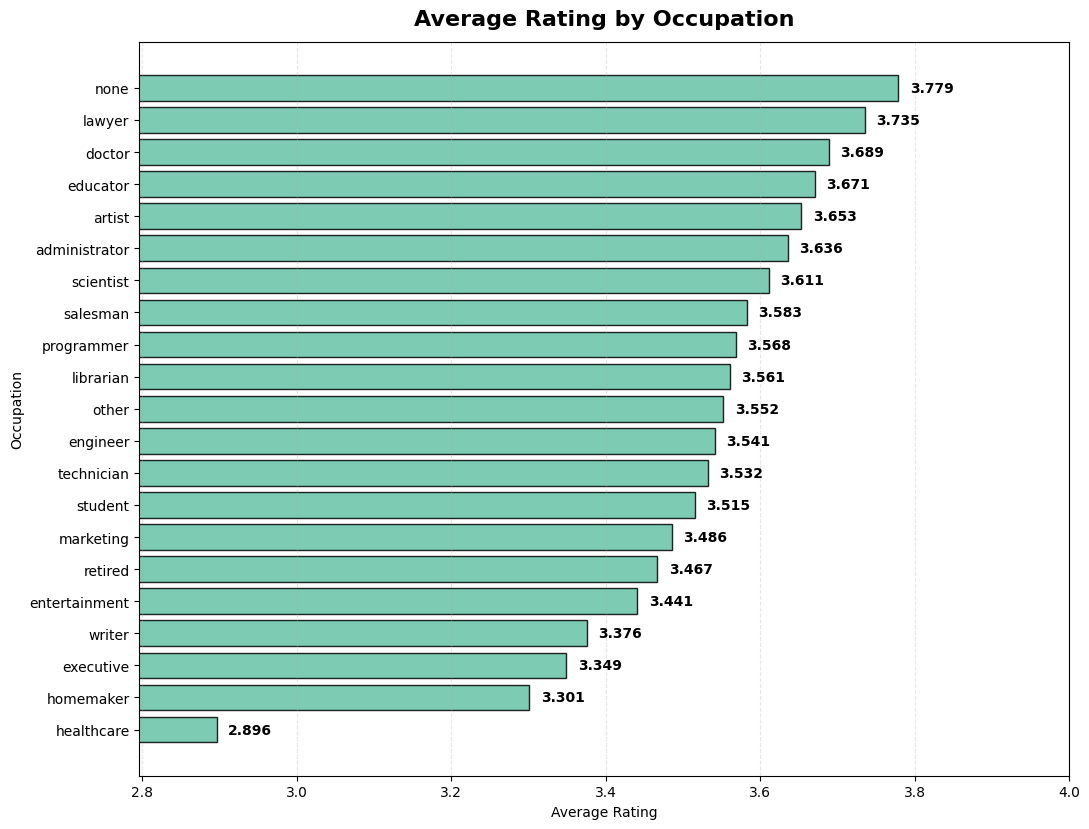

In [33]:
occ = (
    ratings.merge(users[['user_id', 'occupation']], on='user_id')[['occupation', 'rating']]
            .groupby('occupation')['rating'].mean()
            .sort_values(ascending=False)      
)

# Figure height scales with number of rows
fig_h = max(7, 0.4 * len(occ))
fig, ax = plt.subplots(figsize=(11, fig_h))

bars = ax.barh(occ.index, occ.values, color="#66c2a5", edgecolor="black", alpha=0.85)
ax.invert_yaxis()  

# Dynamic x-limits so nothing is clipped
left = max(2.5, occ.min() - 0.1)
ax.set_xlim(left, 4.0)

ax.set_title("Average Rating by Occupation", fontsize=16, weight="bold", pad=12)
ax.set_xlabel("Average Rating")
ax.set_ylabel("Occupation")
ax.grid(axis="x", alpha=0.3, linestyle="--")

# Value labels
for b, v in zip(bars, occ.values):
    ax.text(min(3.98, v + 0.015), b.get_y() + b.get_height()/2, f"{v:.3f}", va="center", ha="left", fontsize=10, weight="bold")

plt.tight_layout()
plt.show()

## Correlation & Popularity Analysis

- **Correlation Heatmap (Users & Ratings):** relationships between age, mean rating, and count of ratings  
- **Popularity vs Average Rating:** scatter plot of number of ratings (log scale) vs average rating  


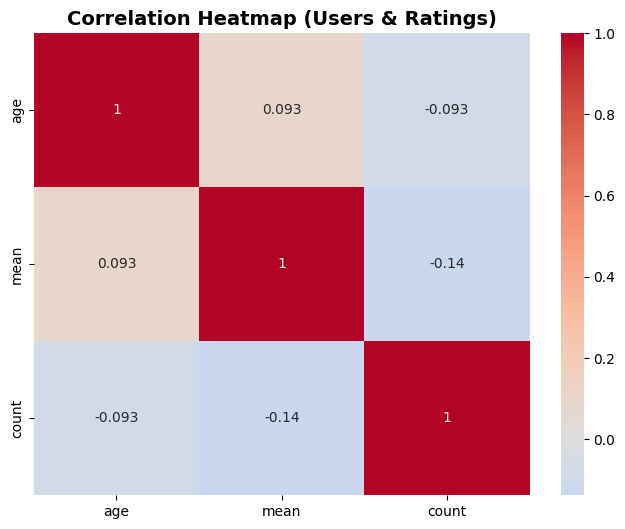

In [34]:
user_ratings = ratings.groupby("user_id")["rating"].agg(["mean", "count"])
user_features = users.merge(user_ratings, left_on="user_id", right_index=True)

corr = user_features[["age", "mean", "count"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Users & Ratings)", fontsize=14, weight="bold")
plt.show()

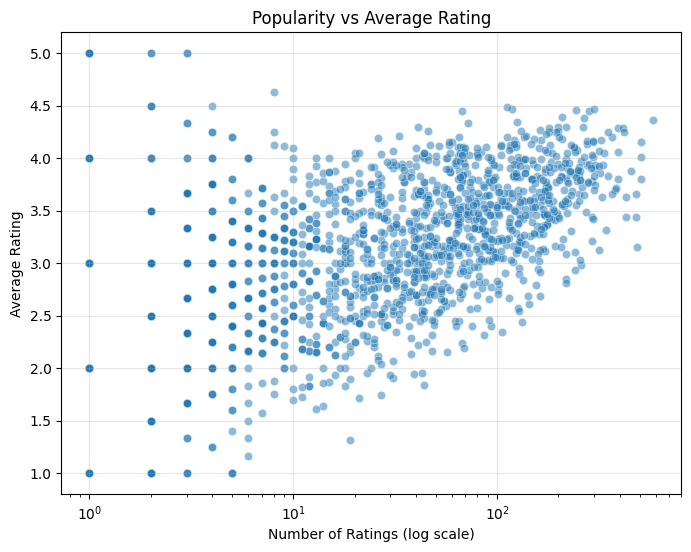

In [35]:
movie_stats = ratings.groupby("movie_id")["rating"].agg(["mean", "count"])
plt.figure(figsize=(8,6))
sns.scatterplot(x="count", y="mean", data=movie_stats, alpha=0.5)
plt.xscale("log")
plt.xlabel("Number of Ratings (log scale)")
plt.ylabel("Average Rating")
plt.title("Popularity vs Average Rating")
plt.grid(alpha=0.3)
plt.show()

## IQR

In [36]:
# Function to apply IQR filter
def remove_outliers_iqr(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]
    outliers = data.shape[0] - filtered_data.shape[0]
    return filtered_data, outliers

# User Activity (ratings per user)
user_activity = ratings.groupby("user_id").size().reset_index(name="count")
user_activity_clean, user_outliers = remove_outliers_iqr(user_activity, "count")
print(f"User Activity - Removed Outliers: {user_outliers}")

# Movie Popularity (ratings per movie)
movie_popularity = ratings.groupby("movie_id").size().reset_index(name="count")
movie_popularity_clean, movie_outliers = remove_outliers_iqr(movie_popularity, "count")
print(f"Movie Popularity - Removed Outliers: {movie_outliers}")


User Activity - Removed Outliers: 42
Movie Popularity - Removed Outliers: 127
